In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### FWER ‚Äî Group Probability of Type I Error

$$FWER = \mathbb{P}(FP > 0)$$

–≥–¥–µ $FP$ ‚Äî —á–∏—Å–ª–æ –ª–æ–∂–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è FWER –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤:

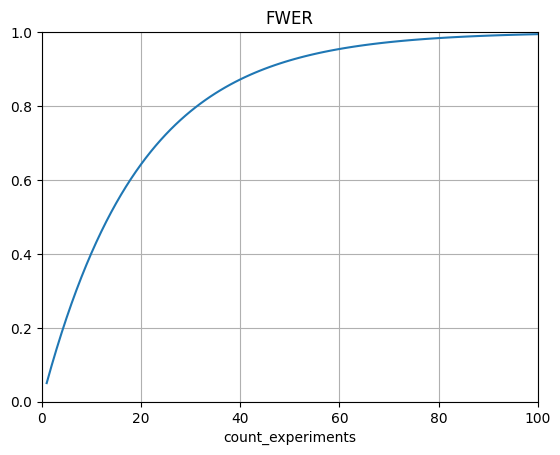

In [2]:
alpha = 0.05
count_experiments = np.arange(1, 101)
array_fwer = 1 - (1 - alpha) ** count_experiments

plt.plot(count_experiments, array_fwer, '-')
plt.grid()
plt.ylim([0, 1])
plt.xlim([0, 100])
plt.xlabel('count_experiments')
plt.title('FWER')
plt.show()

**–ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–æ–ø—É—Å—Ç–∏—Ç—å —Ö–æ—Ç—å –æ–¥–Ω—É –æ—à–∏–±–∫—É I-–≥–æ —Ä–æ–¥–∞ –±—ã—Å—Ç—Ä–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è**.


### Bonferroni Method

–ü—É—Å—Ç—å —É –Ω–∞—Å –µ—Å—Ç—å N –ê/–ê-—Ç–µ—Å—Ç–æ–≤. 
–°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º N p-value –∏–∑ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ [0, 1], –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—è, 
—á—Ç–æ –≤–µ—Ä–Ω–∞ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö. 
–ó–∞–ø–æ–º–Ω–∏–º, –µ—Å—Ç—å –ª–∏ —Å—Ä–µ–¥–∏ —ç—Ç–∏—Ö N —Ç–µ—Å—Ç–æ–≤ –æ—à–∏–±–∫–∏ I-–≥–æ —Ä–æ–¥–∞. 
–ü–æ–≤—Ç–æ—Ä–∏–º —ç—Ç—É –ø—Ä–æ—Ü–µ–¥—É—Ä—É –º–Ω–æ–≥–æ —Ä–∞–∑, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å FWER.

In [10]:
alpha = 0.05
size = 50

list_pvalues = [np.random.rand(size) for _ in range(10000)] # –æ—Ç 0 –¥–æ 1 - 10000 –∑–Ω–∞—á–µ–Ω–∏–π
len(list_pvalues[0])

50

–ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ –±–µ–∑ –ø–æ–ø—Ä–∞–≤–æ–∫ –∫ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º p-value:

In [16]:
res = [int((pvalues <= alpha).sum() > 0) for pvalues in list_pvalues]  # —Å—Ä–µ–¥–∏ 50 pvalues –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Ç–µ –≥–¥–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∞ –æ—à–∏–±–∫–∞ 1 —Ä–æ–¥–∞
print(f'FWER –±–µ–∑ –ø–æ–ø—Ä–∞–≤–æ–∫: {np.mean(res):0.3f}')


FWER –±–µ–∑ –ø–æ–ø—Ä–∞–≤–æ–∫: 0.916


–ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ –ë–æ–Ω—Ñ–µ—Ä—Ä–æ–Ω–∏ –∫ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º p-value:

In [19]:
def method_bonferroni(pvalues, alpha=0.05):
    """–ü—Ä–∏–º–µ–Ω—è–µ—Ç –º–µ—Ç–æ–¥ –ë–æ–Ω—Ñ–µ—Ä—Ä–æ–Ω–∏ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–π.
  
    pvalues - List[float] - —Å–ø–∏—Å–æ–∫ pvalue.
    alpha - float, —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.
    return - np.array, –º–∞—Å—Å–∏–≤ –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü, 0 - —ç—Ñ—Ñ–µ–∫—Ç–∞ –Ω–µ—Ç, 1 - —ç—Ñ—Ñ–µ–∫—Ç –µ—Å—Ç—å.
    """
    m = len(pvalues)
    alpha_ = alpha / m  # —á–∞—Å—Ç–Ω—ã–π —Å–ª—É—á–∞–π m*(m-1)/2 –µ—Å–ª–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤
    res = (np.array(pvalues) <= alpha_).astype(int)  # [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    return res


res_bonferroni = [int(np.sum(method_bonferroni(pvalues)) > 0) for pvalues in list_pvalues]
print(f'FWER —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –ë–æ–Ω—Ñ–µ—Ä—Ä–æ–Ω–∏: {np.mean(res_bonferroni):0.3f}')

FWER —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –ë–æ–Ω—Ñ–µ—Ä—Ä–æ–Ω–∏: 0.052


**–ü–æ–ª—É—á–∏–ª–∏ FWER, –Ω–µ –ø—Ä–µ–≤—ã—à–∞—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha**


### Holm's Method

In [28]:
def method_holm(pvalues, alpha=0.05):
    """–ü—Ä–∏–º–µ–Ω—è–µ—Ç –º–µ—Ç–æ–¥ –•–æ–ª–º–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–π.

    pvalues - List[float] - —Å–ø–∏—Å–æ–∫ pvalue.
    alpha - float, —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.
    return - np.array, –º–∞—Å—Å–∏–≤ –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü, 0 - —ç—Ñ—Ñ–µ–∫—Ç–∞ –Ω–µ—Ç, 1 - —ç—Ñ—Ñ–µ–∫—Ç –µ—Å—Ç—å.
    """
    m = len(pvalues)
    array_alpha = np.arange(m, 0, -1)
    array_alpha = alpha / array_alpha
    sorted_pvalue_indexes = np.argsort(pvalues)
    res = np.zeros(m)
    for idx, pvalue_index in enumerate(sorted_pvalue_indexes):
        pvalue = pvalues[pvalue_index]  # —Å–æ–æ—Ç–≤-–µ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value
        alpha_ = array_alpha[idx]
        if pvalue < alpha_:
            res[pvalue_index] = 1
        else:
            break
    res = res.astype(int)
    return res

res_holm = [int(np.sum(method_holm(pvalues)) > 0) for pvalues in list_pvalues]
print(f'FWER —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –•–æ–ª–º–∞: {np.mean(res_holm):0.3f}')

FWER —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π –•–æ–ª–º–∞: 0.052


**–ö–æ–≥–¥–∞ –≤—Å–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞, –æ—à–∏–±–∫–∏ –ø–µ—Ä–≤–æ–≥–æ —Ä–æ–¥–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö**

### Comparison of Methods

–ë—É–¥–µ–º —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º –∏ —Å—á–∏—Ç–∞—Ç—å –¥–æ–ª—é ¬´–ø—Ä–æ–∫—Ä–∞—Å–∏–≤—à–∏—Ö—Å—è¬ª 
—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å—Ä–µ–¥–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞ (–æ—à–∏–±–∫–∞ I —Ä–æ–¥–∞) –∏ –¥–æ–ª—é ¬´–Ω–µ–ø—Ä–æ–∫—Ä–∞—Å–∏–≤—à–∏—Ö—Å—è¬ª 
—Å—Ä–µ–¥–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º (–æ—à–∏–±–∫–∞ II —Ä–æ–¥–∞).

–ó–∞—Ç–µ–º –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –º–µ–Ω—è—é—Ç—Å—è:

- FWER
- $\mathbb{P}(FN > 0)$ $-$ –∞–Ω–∞–ª–æ–≥ FWER –¥–ª—è –æ—à–∏–±–æ–∫ II —Ä–æ–¥–∞, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–≥–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ —Å FN


In [29]:
def method_baseline(pvalues, alpha=0.05):
    """–ü—Ä–æ–≤–µ—Ä–µ—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –±–µ–∑ –ø–æ–ø—Ä–∞–≤–æ–∫.
    
    pvalues - List[float] - —Å–ø–∏—Å–æ–∫ pvalue.
    alpha - float, —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.
    return - np.array, –º–∞—Å—Å–∏–≤ –∏–∑ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü, 0 - —ç—Ñ—Ñ–µ–∫—Ç–∞ –Ω–µ—Ç, 1 - —ç—Ñ—Ñ–µ–∫—Ç –µ—Å—Ç—å.
    """
    res = (np.array(pvalues) <= alpha).astype(int)
    return res


dict_methods = {
    'baseline': method_baseline,
    'bonferroni': method_bonferroni,
    'holm': method_holm,
}

In [30]:
count_pilots = 100
group_size = 50
effect_size = 1
mean_ = 10
std_ = 1
n_iter = 500


list_count_pilot_with_effect = [1] + list(range(10, count_pilots, 10)) + [count_pilots - 1]  # [10, 20, ..., 90, 99]
dict_method_error = {
    method_name: {
        count_pilot_with_effect: {
            'part_first_type_error': [], 'part_second_type_error': []
        }
        for count_pilot_with_effect in list_count_pilot_with_effect
    }
    for method_name in dict_methods
}


for count_pilot_with_effect in tqdm(list_count_pilot_with_effect):
    count_pilot_without_effect = count_pilots - count_pilot_with_effect

    for _ in range(n_iter):
        # –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞
        list_data = [
            (
                np.random.normal(mean_, std_, group_size),
                np.random.normal(mean_, std_, group_size)
            )
            for _ in range(count_pilot_without_effect)
        ]
        # —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º
        list_data += [
            (
                np.random.normal(mean_, std_, group_size),
                np.random.normal(mean_ + effect_size, std_, group_size)
            )
            for _ in range(count_pilot_with_effect)
        ]
        pvalues = [
            stats.ttest_ind(data_pilot, data_control)[1]
            for data_pilot, data_control in list_data
        ]
        for method_name, method in dict_methods.items():
            result_experiments = method(pvalues)
            dict_method_error[method_name][count_pilot_with_effect]['part_first_type_error'].append(
                np.mean(result_experiments[:count_pilot_without_effect])
            )
            dict_method_error[method_name][count_pilot_with_effect]['part_second_type_error'].append(
                1 - np.mean(result_experiments[count_pilot_without_effect:])
            )

  0%|          | 0/11 [00:00<?, ?it/s]

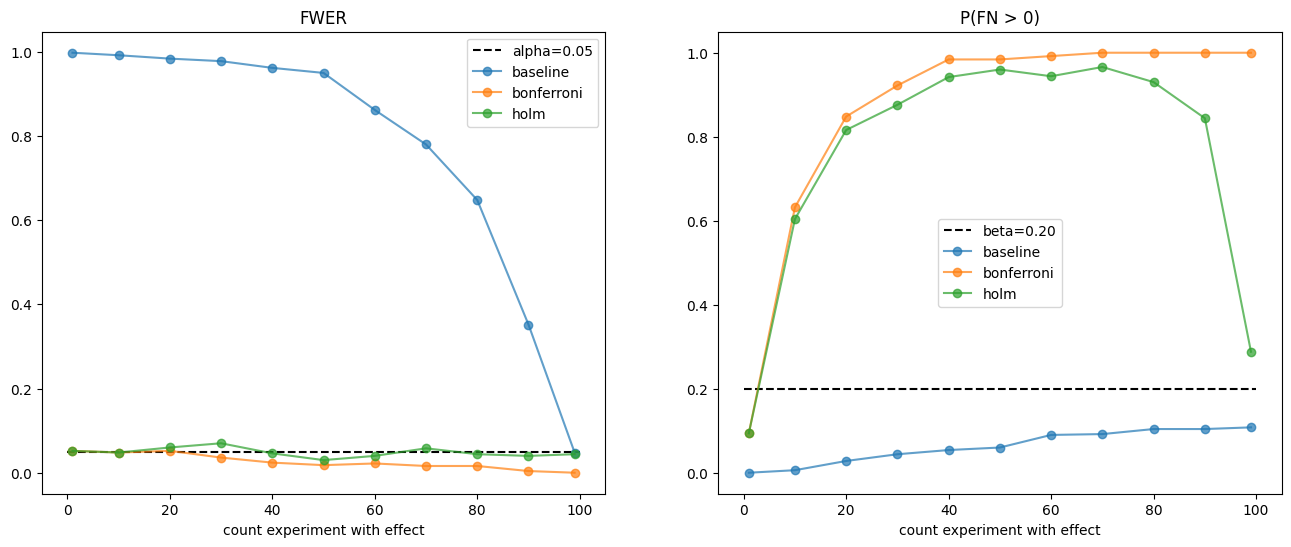

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hlines(0.05, 0, count_pilots, 'k', linestyles='--', label='alpha=0.05')
axes[1].hlines(0.2, 0, count_pilots, 'k', linestyles='--', label='beta=0.20')

graph_types = ['FWER', 'P(FN > 0)']
for method_name, dict_errors in dict_method_error.items():
    X = []
    dict_Y = {graph_type: [] for graph_type in graph_types}
    for count_pilot, dict_ in dict_errors.items():
        X.append(count_pilot)
        dict_Y['FWER'].append(np.mean(np.array(dict_['part_first_type_error']) > 0))
        dict_Y['P(FN > 0)'].append(np.mean(np.array(dict_['part_second_type_error']) > 0))
    for graph_type, Y in dict_Y.items():
        idx = graph_types.index(graph_type)
        axes[idx].plot(X, Y, '-o', label=method_name, alpha=0.7)

for graph_type, ax in zip(graph_types, axes):
    ax.set_title(graph_type)
    ax.set_xlabel('count experiment with effect')
    if graph_type in graph_types:
        ax.legend()

**FWER:**

- baseline –¥–æ–ø—É—Å–∫–∞–µ—Ç –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞ –ø–æ—á—Ç–∏ –≤ 100% —Å–ª—É—á–∞—è—Ö, –∫–æ–≥–¥–∞ 99 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞, 
    –∑–∞—Ç–µ–º –ø—Ä–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—à–∏–±–∫–∏ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è
- bonferroni –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—Ç FWER –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.05, –∫–æ–≥–¥–∞ –≤—Å–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±–µ–∑ —ç—Ñ—Ñ–µ–∫—Ç–∞, 
    –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º FWER —Å–Ω–∏–∂–∞–µ—Ç—Å—è
- holm –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—Ç FWER –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.05


$\mathbb{P}(FN>0)$:

- baseline –¥–æ–ø—É—Å–∫–∞–µ—Ç –º–µ–Ω—å—à–µ –¥—Ä—É–≥–∏—Ö –æ—à–∏–±–∫–∏ II —Ä–æ–¥–∞
- bonferroni —á–∞—â–µ –¥—Ä—É–≥–∏—Ö –æ—à–∏–±–æ—á–Ω–æ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º
- holm –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º –∏–º–µ–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—à–∏–±–æ–∫ II —Ä–æ–¥–∞, 
    –ø–æ—Ö–æ–∂—É—é –Ω–∞ bonferroni, –Ω–æ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —ç—Ñ—Ñ–µ–∫—Ç–æ–º –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è –ª—É—á—à–µ (—Ä–µ–∂–µ –æ—à–∏–±–∞–µ—Ç—Å—è)

### Pizzeria's Data

–†–∞–∑–±–µ—Ä—ë–º –ø–æ–¥—Ä–æ–±–Ω–µ–µ –∏–Ω—Ü–µ–¥–µ–Ω—Ç —Å –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤.

–í –Ω–∞—à–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ (Font color) –ø—Ä–æ–≤–µ—Ä—è–ª–∞—Å—å –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –≤–ª–∏—è–Ω–∏–∏ —Ü–≤–µ—Ç–∞ —Ç–µ–∫—Å—Ç–∞ –Ω–∞ —Å—Ä–µ–¥–Ω—é—é –≤—ã—Ä—É—á–∫—É —Å –∫–ª–∏–µ–Ω—Ç–∞. 
–ù–æ, –Ω–µ –¥–æ–∂–∏–¥–∞—è—Å—å –µ–≥–æ –æ–∫–æ–Ω—á–∞–Ω–∏—è, –∫—Ç–æ-—Ç–æ –∑–∞–ø—É—Å—Ç–∏–ª —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å —Ä–∞–∑–Ω—ã–º–∏ —Ü–≤–µ—Ç–∞–º–∏ —Ñ–æ–Ω–∞ –∫–Ω–æ–ø–∫–∏ (Background color). 
–î–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ª—é–¥–µ–π, –ø–æ–ø–∞–≤—à–∏—Ö –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –≤ –æ–±–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, —Ç–µ–∫—Å—Ç –∏ —Ñ–æ–Ω –∫–Ω–æ–ø–∫–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –æ–¥–Ω–æ–≥–æ —Ü–≤–µ—Ç–∞.

**–î–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤:**

- Font color ‚Äî —Å 2022-05-16 –ø–æ 2022-05-23
- Background color ‚Äî —Å 2022-05-19 –ø–æ 2022-05-26


In [34]:
import os
from datetime import datetime, timedelta

begin_font = datetime(2022, 5, 16)
begin_back = datetime(2022, 5, 19)

end_font = datetime(2022, 5, 23)
end_back = datetime(2022, 5, 26)

URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-05-27/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

df_sales = read_database('2022-05-27T12_df_sales.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_users = read_database('experiment_users.csv')

df_sales - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–æ–∫—É–ø–∫–∞—Ö, –æ–¥–Ω–∞ —Å—Ç—Ä–æ–∫–∞ - –æ–¥–∏–Ω –∑–∞–∫–∞–∑. –ê—Ç—Ä–∏–±—É—Ç—ã:
- sale_id - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–∫—É–ø–∫–∏;
- date - –¥–∞—Ç–∞ –ø–æ–∫—É–ø–∫–∏;
- count_pizza - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∏—Ü—Ü –≤ –∑–∞–∫–∞–∑–µ;
- count_drink - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–ø–∏—Ç–∫–æ–≤ –≤ –∑–∞–∫–∞–∑–µ;
- price - —Å—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞–∫–∞–∑–∞;
- user_id - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è;

df_users - —Å–ø–∏—Å–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–∏—Ö –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö Font color –∏ Background color. –ï—Å–ª–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–π –≥—Ä—É–ø–ø–æ–π —Å—Ç–æ–∏—Ç 1, –∑–Ω–∞—á–∏—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ø–æ–ø–∞–ª –≤ —ç—Ç—É –≥—Ä—É–ø–ø—É.

In [35]:
df_users.head()

user_id  Font color (control)  Font color (pilot)  \
0  ec6536                     1                   0   
1  82fdba                     1                   0   
2  83d7c5                     1                   0   
3  294d1c                     1                   0   
4  faaa6f                     1                   0   

   Background color (control)  Background color (pilot)  
0                           0                         0  
1                           1                         0  
2                           0                         0  
3                           1                         0  
4                           0                         1

–°–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –≤–∞—Ä–∏–∞–Ω—Ç–∞–º –ø–æ–ø–∞–¥–∞–Ω–∏—è –≤ —Ä–∞–∑–Ω—ã–µ –≥—Ä—É–ø–ø—ã, –ø–æ—Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–º–µ—Ä—ã —ç—Ç–∏—Ö –≥—Ä—É–ø–ø

In [36]:
df_users.groupby(df_users.columns.tolist()[1:])[['user_id']].count().reset_index()

Font color (control)  Font color (pilot)  Background color (control)  \
0                     0                   0                           0   
1                     0                   0                           1   
2                     0                   1                           0   
3                     0                   1                           0   
4                     0                   1                           1   
5                     1                   0                           0   
6                     1                   0                           0   
7                     1                   0                           1   

   Background color (pilot)  user_id  
0                         1     6294  
1                         0     6277  
2                         0     6553  
3                         1     6486  
4                         0     6658  
5                         0     6372  
6                         1     6643  
7                         0     6579

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ —Å—É–º–º–∞—Ä–Ω–æ–π –≤—ã—Ä—É—á–∫–∏ –ø–æ –¥–Ω—è–º –ø–æ –≥—Ä—É–ø–ø–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–æ–≥–æ, 
–≤ –∫–∞–∫–∏–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –≥—Ä—É–ø–ø—ã –æ–Ω–∏ –ø–æ–ø–∞–ª–∏:

In [37]:
delta = timedelta(15)
df_sales_filtered = (
    df_sales
    [(df_sales['date'] >= begin_font - delta) & (df_sales['date'] < end_back)]
    [['user_id', 'price', 'date']]
    .copy()
)

df = pd.merge(
    df_users,
    df_sales_filtered,
    on='user_id',
    how='inner'
)

df['day'] = df['date'].dt.date
df['group'] = 'control'
df.loc[(df['Font color (pilot)'] == 1) & (df['Background color (pilot)'] == 0), 'group'] = 'Font pilot'
df.loc[(df['Font color (pilot)'] == 0) & (df['Background color (pilot)'] == 1), 'group'] = 'Background pilot'
df.loc[(df['Font color (pilot)'] == 1) & (df['Background color (pilot)'] == 1), 'group'] = 'both pilot'

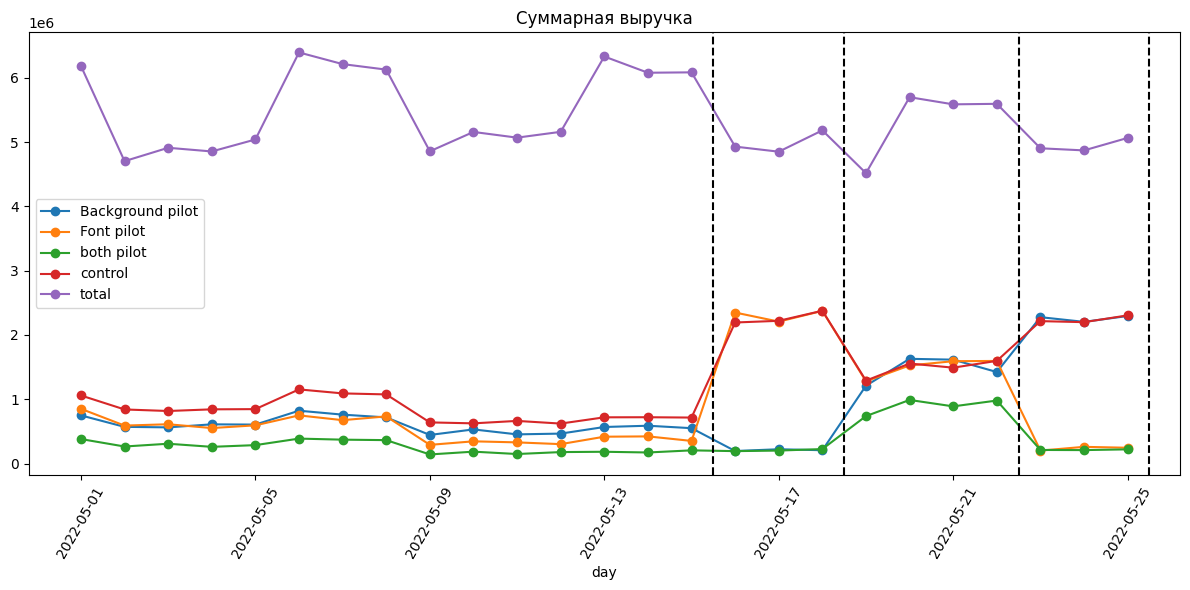

In [41]:
df_agg = df.groupby(['group', 'day'])[['price']].sum().reset_index().rename(columns={'price': 'revenue'})
df_pivot = df_agg.pivot(index='day', columns='group', values='revenue')

df_pivot = pd.merge(
    df_pivot,
    df_sales_filtered.groupby(df_sales_filtered['date'].dt.date)[['price']].sum().rename(columns={'price': 'total'}),
    left_index=True,
    right_index=True,
    how='left'
)

fig, ax = plt.subplots(figsize=(12, 6))

df_pivot.plot(rot=60, style='-o', ax=ax)

for date_ in [begin_font, end_font, begin_back, end_back]:
    ax.axvline(x=date_ - timedelta(days=0.5), linestyle='--', color='k')

ax.set_title('–°—É–º–º–∞—Ä–Ω–∞—è –≤—ã—Ä—É—á–∫–∞')
plt.tight_layout()
plt.show()

–í–æ –≤—Ä–µ–º—è –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –∏–∑ 4-—Ö –≥—Ä—É–ø–ø –±—ã–ª–æ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–ª–æ–≤–µ–∫. 
**–í–∏–¥–Ω–æ, —á—Ç–æ –≤—ã—Ä—É—á–∫–∞ —É –≥—Ä—É–ø–ø—ã, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–ø–∞–ª–∞ —Å—Ä–∞–∑—É –≤ –æ–±–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, –º–µ–Ω—å—à–µ**.


#### Experiment Evaluation

–û—Ü–µ–Ω–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –æ—Ç–ª–∏—á–∏–π —Å—Ä–µ–¥–Ω–µ–π –≤—ã—Ä—É—á–∫–∏ —Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –ø–æ–º–æ—â—å—é  t-test:

In [42]:
df_users_exp = (
    df_users
    [(df_users['Font color (control)'] == 1) | (df_users['Font color (pilot)'] == 1)]
    [['user_id', 'Font color (control)', 'Font color (pilot)']]
    .copy()
)

df_sales_exp = (
    df_sales
    [(df_sales['date'] >= begin_font) & (df_sales['date'] < end_font)]
    .groupby('user_id')[['price']].sum()
    .reset_index()
)

df_exp = pd.merge(df_users_exp, df_sales_exp, on='user_id', how='left').fillna(0)

control = df_exp[df_exp['Font color (control)'] == 1]['price'].values
pilot = df_exp[df_exp['Font color (pilot)'] == 1]['price'].values

print(f'len(control) = {len(control)}, len(pilot) = {len(pilot)}')
print(f'np.mean(pilot) - np.mean(control) = {np.mean(pilot) - np.mean(control):0.2f}')
print(stats.ttest_ind(control, pilot))

len(control) = 19594, len(pilot) = 19697
np.mean(pilot) - np.mean(control) = -111.11
TtestResult(statistic=12.351179891447554, pvalue=5.575006488410081e-35, df=39289.0)


–°—Ä–µ–¥–Ω—è—è –≤—ã—Ä—É—á–∫–∞ —Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è **–∑–Ω–∞—á–∏–º–æ —É–º–µ–Ω—å—à–∏–ª–∞—Å—å**.

–ü–æ–ø—Ä–æ–±—É–µ–º **—É–±—Ä–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤, –ø–æ–ø–∞–≤—à–∏—Ö –≤–æ –≤—Ç–æ—Ä–æ–π —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç**:

In [43]:
df_users_exp_two = (
    df_users
    [
        ((df_users['Font color (control)'] == 1) | (df_users['Font color (pilot)'] == 1))
        & (df_users['Background color (pilot)'] == 0)
    ]
    [['user_id', 'Font color (control)', 'Font color (pilot)']]
    .copy()
)

df_exp = pd.merge(df_users_exp_two, df_sales_exp, on='user_id', how='left').fillna(0)

In [44]:
control = df_exp[df_exp['Font color (control)'] == 1]['price'].values
pilot = df_exp[df_exp['Font color (pilot)'] == 1]['price'].values

print(f'len(control) = {len(control)}, len(pilot) = {len(pilot)}')
print(f'np.mean(pilot) - np.mean(control) = {np.mean(pilot) - np.mean(control):0.2f}')
print(stats.ttest_ind(control, pilot))

len(control) = 12951, len(pilot) = 13211
np.mean(pilot) - np.mean(control) = -4.22
TtestResult(statistic=0.38385425255319694, pvalue=0.7010895944356124, df=26160.0)


**–û—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã–µ**

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤–æ–∑–º–æ–∂–Ω—ã—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å —Ç—Ä–µ–±—É–µ–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [50]:
import numpy as np
from scipy import stats
from tqdm.notebook import tqdm

# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
total_size = 10000
mean_ = 100
std_ = 10
effect = 0.03
alpha = 0.05
beta = 0.1


def estimate_sample_size(effect, std, alpha, beta):
    """–û—Ü–µ–Ω–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–≥–æ —Ä–∞–∑–º–µ—Ä –≥—Ä—É–ø–ø."""
    t_alpha = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    t_beta = stats.norm.ppf(1 - beta, loc=0, scale=1)
    var = 2 * std ** 2
    sample_size = int((t_alpha + t_beta) ** 2 * var / (effect ** 2))
    return sample_size


# –æ—Ü–µ–Ω–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π —Ä–∞–∑–º–µ—Ä –≥—Ä—É–ø–ø
sample_size = estimate_sample_size(effect * 100, 10, alpha, beta)
print(f'sample_size = {sample_size}')
# –≤—ã—á–∏—Å–ª–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
count_exp = total_size / (sample_size * 2)
print(f'count_exp = {count_exp:0.1f}')


def estimate_ci_bernoulli(p, n, alpha=0.05):
    """–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –ë–µ—Ä–Ω—É–ª–ª–∏–µ–≤—Å–∫–æ–π —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã."""
    t = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    std_n = np.sqrt(p * (1 - p) / n)
    return p - t * std_n, p + t * std_n

# –ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –ø—Ä–∏ 21 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –æ—à–∏–±–∫–∏ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—Ç—Å—è –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö, –∞ –ø—Ä–∏ 22 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö –Ω–µ—Ç.

for count_exp in [21, 22]:
    errors_aa = []
    errors_ab = []
    sample_size = int(total_size / (int(count_exp) * 2))
    for _ in tqdm(range(10000)):
        a, b = np.random.normal(mean_, std_, (2, sample_size,))
        b_effect = b * (1 + effect)
        errors_aa.append(stats.ttest_ind(a, b).pvalue < alpha)
        errors_ab.append(stats.ttest_ind(a, b_effect).pvalue >= alpha)

    estimated_first_type_error = np.mean(errors_aa)
    estimated_second_type_error = np.mean(errors_ab)
    ci_first = estimate_ci_bernoulli(estimated_first_type_error, len(errors_aa))
    ci_second = estimate_ci_bernoulli(estimated_second_type_error, len(errors_ab))
    print(f'count_exp = {count_exp}')
    print(f'sample_size = {sample_size}')
    print(f'–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞ = {estimated_first_type_error:0.4f}')
    print(f'  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [{ci_first[0]:0.4f}, {ci_first[1]:0.4f}]')
    print(f'–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ II —Ä–æ–¥–∞ = {estimated_second_type_error:0.4f}')
    print(f'  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [{ci_second[0]:0.4f}, {ci_second[1]:0.4f}]')


sample_size = 233
count_exp = 21.5


  0%|          | 0/10000 [00:00<?, ?it/s]

count_exp = 21
sample_size = 238
–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞ = 0.0454
  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [0.0413, 0.0495]
–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ II —Ä–æ–¥–∞ = 0.1033
  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [0.0973, 0.1093]


  0%|          | 0/10000 [00:00<?, ?it/s]

count_exp = 22
sample_size = 227
–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞ = 0.0506
  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [0.0463, 0.0549]
–æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ II —Ä–æ–¥–∞ = 0.1221
  –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª = [0.1157, 0.1285]



#### –°–ª—É—á–∞–π `count_exp = 21`

* **sample\_size = 238**
* –û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: `0.0454`, CI = `[0.0413, 0.0495]` ‚Äî **–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã**
* –û—à–∏–±–∫–∞ II —Ä–æ–¥–∞: `0.1033`, CI = `[0.0973, 0.1093]` ‚Äî **–Ω–∞ –≥—Ä–∞–Ω–∏—Ü–µ**, –Ω–æ —Ç–æ–∂–µ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö **–¥–æ–ø—É—Å—Ç–∏–º–æ–≥–æ Œ≤ = 0.1**

üí° –¢–æ –µ—Å—Ç—å –ø—Ä–∏ **21 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ** –æ–±–µ –æ—à–∏–±–∫–∏ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–æ–ø—É—Å—Ç–∏–º—ã—Ö –ø—Ä–µ–¥–µ–ª–∞—Ö.

---

#### –°–ª—É—á–∞–π `count_exp = 22`

* **sample\_size = 227**
* –û—à–∏–±–∫–∞ I —Ä–æ–¥–∞: `0.0506`, CI = `[0.0463, 0.0549]` ‚Äî **—É–∂–µ –ø–µ—Ä–µ—Å–µ–∫–∞–µ—Ç –≤–µ—Ä—Ö–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É 0.05**
* –û—à–∏–±–∫–∞ II —Ä–æ–¥–∞: `0.1221`, CI = `[0.1157, 0.1285]` ‚Äî **—è–≤–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –¥–æ–ø—É—Å—Ç–∏–º—É—é Œ≤ = 0.1**

–ó–Ω–∞—á–∏—Ç, **–ø—Ä–∏ 22 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö** —É–∂–µ –Ω–∞—Ä—É—à–∞–µ—Ç—Å—è –∫–æ–Ω—Ç—Ä–æ–ª—å –æ–±–µ–∏—Ö –æ—à–∏–±–æ–∫:

* –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ª–æ–∂–Ω–æ–≥–æ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è (—Ç–∏–ø I) –≤—ã—à–µ –ø–æ—Ä–æ–≥–∞,
* –º–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞ –ø–∞–¥–∞–µ—Ç (—Ç–∏–ø II –æ—à–∏–±–∫–∞ —Ä–∞—Å—Ç—ë—Ç).
